In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
N_train = 400
N_test = 400
noise = 50
male_avg = np.asarray([70,170])
male_std = np.asarray([7,10])

female_avg = np.asarray([60,150])
female_std = np.asarray([5,8])

X_train = np.zeros((N_train,2))
Y_train = np.zeros((N_train,1))

X_test = np.zeros((N_test,2))
Y_test = np.zeros((N_test,1))

X_train[:N_train/2,:] = np.random.randn(N_train/2,2)*male_std+male_avg
X_train[N_train/2:,:] = np.random.randn(N_train/2,2)*female_std+female_avg
Y_train[N_train/2:] = 1

X_test[:N_test/2,:] = np.random.randn(N_test/2,2)*male_std+male_avg
X_test[N_test/2:,:] = np.random.randn(N_test/2,2)*female_std+female_avg
Y_test[N_test/2:] = 1

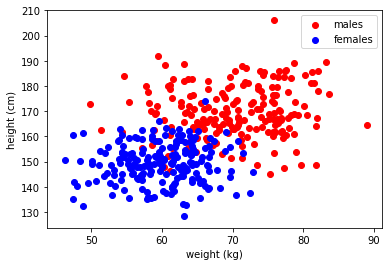

In [3]:
plt.figure()
plt.scatter(X_train[:N_train/2,0],X_train[:N_train/2,1], color='r', label='males')
plt.scatter(X_train[N_train/2:,0],X_train[N_train/2:,1], color='b', label='females')
plt.xlabel('weight (kg)')
plt.ylabel('height (cm)')
plt.legend()
plt.show()

In [4]:
mu = np.mean(X_train,axis=0)
std = np.std(X_train,axis=0)

X_train = (X_train-mu)/std
X_test = (X_test-mu)/std

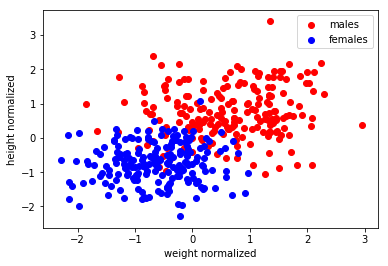

In [5]:
plt.figure()
plt.scatter(X_train[:N_train/2,0],X_train[:N_train/2,1], color='r', label='males')
plt.scatter(X_train[N_train/2:,0],X_train[N_train/2:,1], color='b', label='females')
plt.xlabel('weight normalized')
plt.ylabel('height normalized')
plt.legend()
plt.show()

In [6]:
def sigmoid(x):
    return 1.0/(1+np.exp(-x))

def binaryCrossEntropy(y,yhat):
    eps = 1e-5
    l = -(1-y)*np.log((1-yhat+eps)) - y*np.log(yhat+eps)
    return np.mean(l)

def gradient(y,x,yhat):
    eps=1e-5
    return np.mean((yhat-y)/(yhat**4+eps)*x,axis=0)

In [7]:
learning_rate = 1e-4
N_iterations = 5000
Theta = np.asarray([1.0,1.0])
b = 0.0
print_every = 100
train_loss = []
test_loss = []
iters = []
thetas = []
for i in range(N_iterations):
        a = np.sum(Theta*X_train,axis=1,keepdims=True)+b
        Yhat = sigmoid(a)
        g = gradient(Y_train, X_train, Yhat)
        Theta = Theta-learning_rate*g
        
        if (i)%print_every == 0:

            e = binaryCrossEntropy(Y_train,Yhat)
            train_loss.append(e)
            
            a = np.sum(Theta*X_test,axis=1, keepdims=True)+b
            Yhat_test = sigmoid(a)
            e_test = binaryCrossEntropy(Y_test,Yhat_test)
            test_loss.append(e_test)
            
            iters.append(i)
            thetas.append(Theta)
            print "Iteration {}: Theta={}, BCE_train = {}, BCE_test = {}".format(i,
                Theta,e,e_test)

Iteration 0: Theta=[ 0.42555944  0.50156894], BCE_train = 1.68699673002, BCE_test = 1.06156008504
Iteration 100: Theta=[ 0.19131105  0.25864951], BCE_train = 0.869063779976, BCE_test = 0.856937387771
Iteration 200: Theta=[ 0.1066013  0.1624366], BCE_train = 0.794261285187, BCE_test = 0.787764325803
Iteration 300: Theta=[ 0.0451488   0.09096811], BCE_train = 0.74322379408, BCE_test = 0.74022161161
Iteration 400: Theta=[-0.0078995   0.02898148], BCE_train = 0.701780753435, BCE_test = 0.701408780215
Iteration 500: Theta=[-0.05850282 -0.02978192], BCE_train = 0.664746920013, BCE_test = 0.666554784741
Iteration 600: Theta=[-0.11078653 -0.08967053], BCE_train = 0.629156696141, BCE_test = 0.632888830996
Iteration 700: Theta=[-0.16955011 -0.15572371], BCE_train = 0.592366842563, BCE_test = 0.597882582479
Iteration 800: Theta=[-0.24400177 -0.23767037], BCE_train = 0.550330408484, BCE_test = 0.557565717567
Iteration 900: Theta=[-0.36735643 -0.37169606], BCE_train = 0.490431939956, BCE_test = 0.4

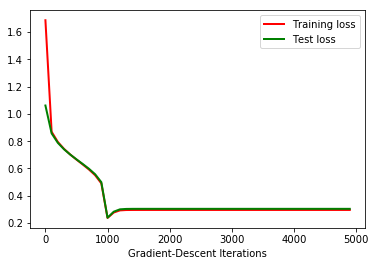

In [8]:
plt.plot(iters,train_loss,linewidth=2,color='r',label='Training loss')
plt.plot(iters,test_loss, linewidth=2, color='g', label='Test loss')
plt.xlabel('Gradient-Descent Iterations')
plt.legend()
plt.show()

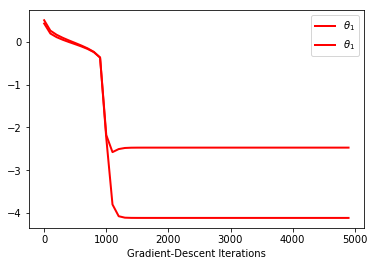

In [9]:
plt.plot(iters,thetas,linewidth=2,color='r',label=r'$\theta_1$')
plt.xlabel('Gradient-Descent Iterations')
plt.legend()
plt.show()

In [10]:
train_line = (0.5-Theta[0]*X_train[:,0])/Theta[1]

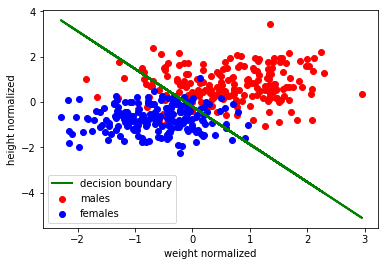

In [11]:
plt.figure()
plt.scatter(X_train[:N_train/2,0],X_train[:N_train/2,1], color='r', label='males')
plt.scatter(X_train[N_train/2:,0],X_train[N_train/2:,1], color='b', label='females')
plt.plot(X_train[:,0],train_line,color='g',linewidth=2,label='decision boundary')
plt.xlabel('weight normalized')
plt.ylabel('height normalized')
plt.legend()
plt.show()

In [12]:
test_line = (0.5-Theta[0]*X_test[:,0])/Theta[1]

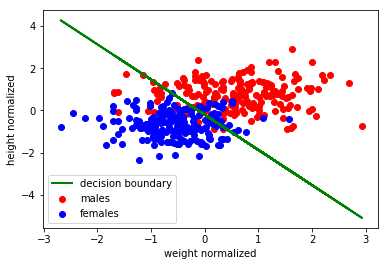

In [13]:
plt.figure()
plt.scatter(X_test[:N_test/2,0],X_test[:N_test/2,1], color='r', label='males')
plt.scatter(X_test[N_test/2:,0],X_test[N_test/2:,1], color='b', label='females')
plt.plot(X_test[:,0],test_line,color='g',linewidth=2,label='decision boundary')
plt.xlabel('weight normalized')
plt.ylabel('height normalized')
plt.legend()
plt.show()

In [18]:
ypred = sigmoid(np.sum(Theta*X_test,axis=1,keepdims=True)+b)
ythresh = ypred.copy()
ythresh[ythresh>0.5] = 1
ythresh[ythresh<=0.5] = 0
accuracy = np.mean((ythresh.astype(int)==Y_test.astype(int)))
print "Test accuracy = {}%".format(accuracy*100)

Test accuracy = 88.25%


In [15]:
def recall(y,yhat):
    TP = np.sum(y*yhat)
    FN = np.sum((1-yhat)*y)

    return float(TP)/(FN+TP)

def precision(y,yhat):
    FP = np.sum(yhat*(1-y))
    TP = np.sum(yhat*y)

    return float(TP)/(FP+TP)

In [19]:
precisions = []
recalls = []
for i in np.arange(0,1.0,0.001):
    yhat = ypred.copy()
    yhat[yhat>i] = 1.0
    yhat[yhat<=i] = 0.0
    p = precision(Y_test,yhat)
    r = recall(Y_test,yhat)
    
    precisions.append(p)
    recalls.append(r)

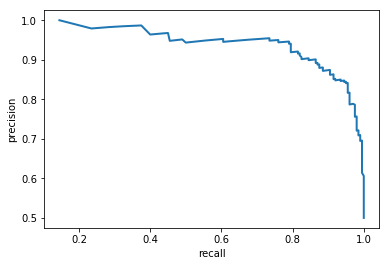

In [20]:
plt.figure()
plt.plot(recalls,precisions,linewidth=2)
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()